## Spam Detection (Supervised Learning)

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay



In [2]:
# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
df = pd.read_csv("spam.csv",encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Data Preprocessing
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace= True)
# rename columns 
df.rename(columns={"v2":"text","v1":"label"},inplace=True)

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='label', ylabel='count'>

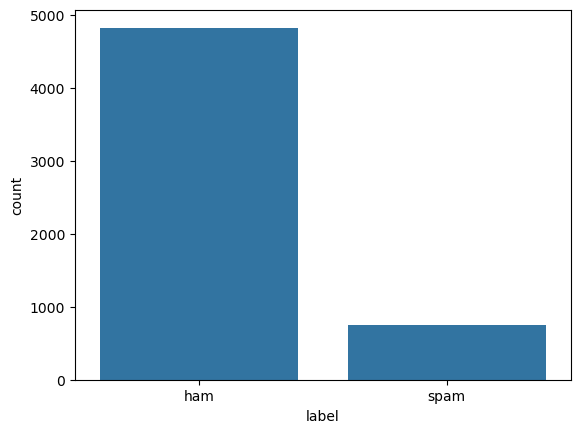

In [5]:
# check the data is imbalance or not
sns.countplot(df,x="label")
# from the graph we get the point that the dataset is imbalanced so we can go with F1 score,AUC-score and Precision, Recall

In [6]:
# Feature enginering 
df["label"] = df["label"].map({
    "ham":0,
    "spam": 1
})

In [7]:
df.head(2)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [8]:
# split of the data 

X_train, X_test, y_train, y_test = train_test_split(df["text"],df['label'])

In [9]:
X_train.head(2)

1942    K...k:)why cant you come here and search job:)
2991         K.i did't see you.:)k:)where are you now?
Name: text, dtype: object

In [10]:
y_train.head(2)

1942    0
2991    0
Name: label, dtype: int64

In [11]:
print(len(X_train))
print(len(y_train))

4179
4179


In [12]:
# Text to Vectorization using TFIDFVectorization and CountVectorizaton

vectorizer = CountVectorizer(stop_words='english')
X_train_Vector = vectorizer.fit_transform(X_train)
X_test_Vector = vectorizer.transform(X_test)

In [13]:
len(vectorizer.get_feature_names_out())

7190

In [14]:
vector_df = pd.DataFrame(data=X_train_Vector.toarray(),columns=vectorizer.get_feature_names_out())
vector_df

,00,000,008704050406,0089,0121,01223585334,0125698789,02,0207,02072069400,...,ìï,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_Vector,y_train)

y_pre = mnb.predict(X_test_Vector           )


In [16]:
confusion_matrix(y_test,y_pre)


array([[1193,    3],
       [  20,  177]])

In [17]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1196
           1       0.98      0.90      0.94       197

    accuracy                           0.98      1393
   macro avg       0.98      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [18]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pre)

0.9833333333333333

In [19]:
f1_score(y_test,y_pre)

0.9389920424403183

In [26]:
roc_auc_score(y_test,mnb.predict_proba(X_test_Vector)[:,1])  
# use ro_auc_score false postive and flase negative have same important, when the data is
# unbalance we have to focus on the precision and recall


0.9819406481843032

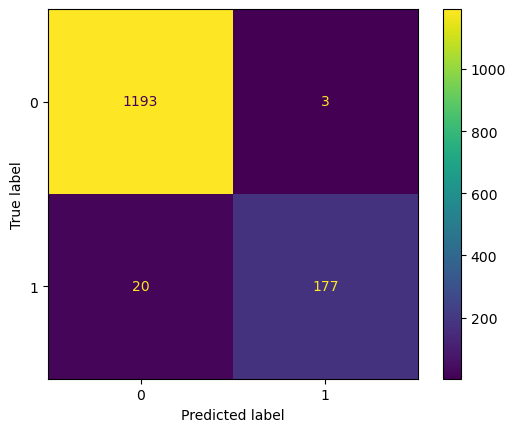

In [35]:
# confustion matrix 
cm = confusion_matrix(y_test, y_pre, labels=mnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [37]:
# show words 
from wordcloud import WordCloud

In [136]:
# Generate a word cloud image
def words_visualization(label):
    words =["ham","spam"]
    
    data = df[df["label"] == words.index(label)]
    mess = ''
    for x in data["text"]:
        mess += x + ' '
    wordcloud = WordCloud(width=600,height=400).generate(mess)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
   

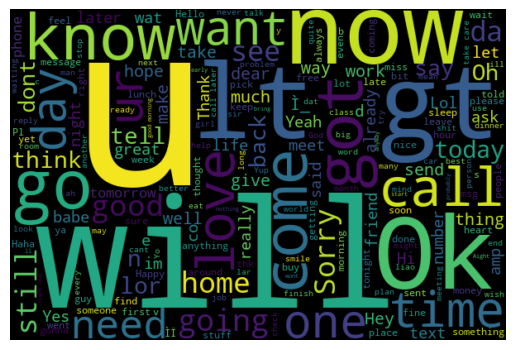

In [137]:
words_visualization("ham")

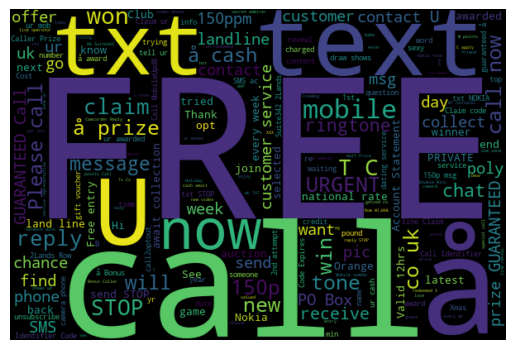

In [ ]:
words_visualization("spam")
